<a href="https://colab.research.google.com/github/edmenciab733/clases/blob/main/redes_neuronales_hola_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## Redes neuronales

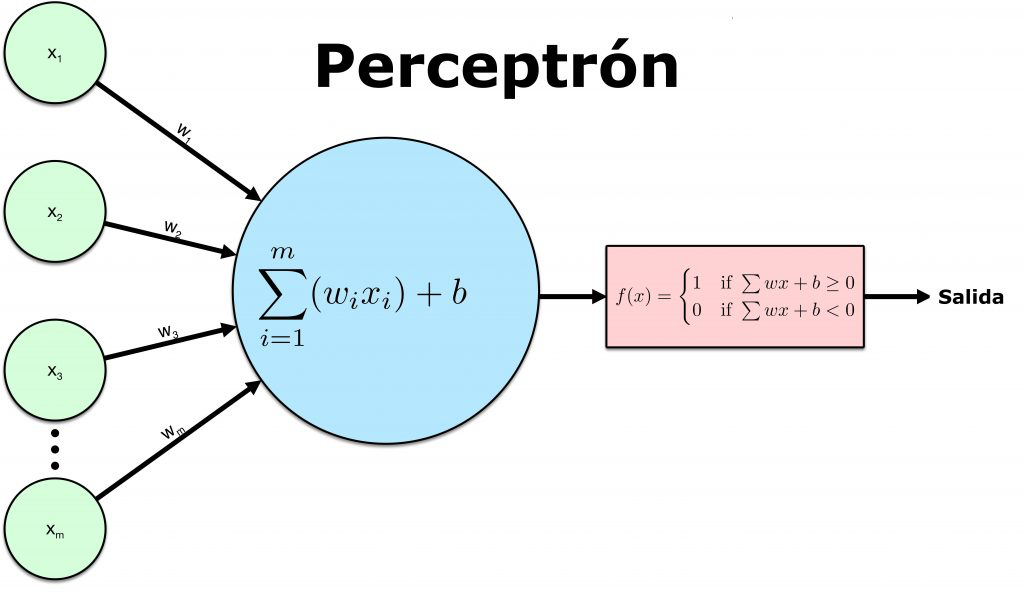

## Hola Mundo: Dataset Mnist

Tal y como explican en el sitio web, las imágenes originales fueron normalizadas de forma que cupiesen en un grid de 20x20 píxels manteniendo las proporciones de la imagen original, y el resultado se centró en un grid de 28x28 píxels. Es de estas modificaciones de donde proviene la "M" de "MNIST" (Modified National Institute of Standards and Technology, Instituto de Estándares y Tecnología de los Estados Unidos).

Las muestras incluidas en el conjunto de entrenamiento fueron el resultado de escanear dígitos manuscritos de 250 personas (estudiantes de "high schools" y empleados de la oficina del Censo de los Estados Unidos). El dataset de pruebas contiene dígitos escaneados de otras 250 personas diferentes (con los mismos perfiles), lo que permite asegurar que los modelos obtenidos son capaces de interpretar dígitos incluso de personas no involucradas en la generación de los datos de entrenamiento.


https://interactivechaos.com/es/manual/tutorial-de-deep-learning/el-dataset-mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

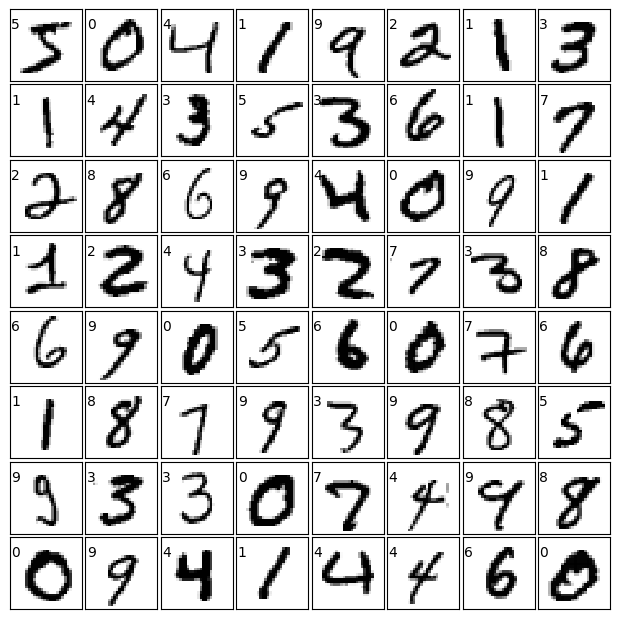

In [ ]:
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(y_train[i]))

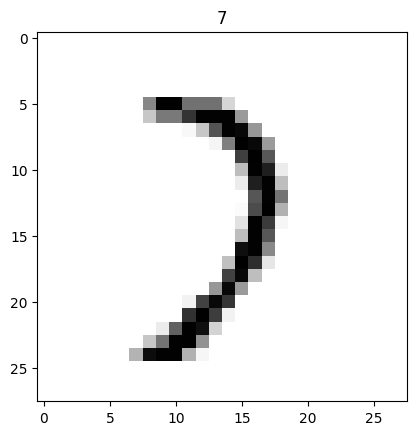

In [ ]:
index =140
plt.title(y_train[index])
plt.imshow(x_train[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()

In [ ]:
x_train = x_train/255.0
y_test = y_test/255.0

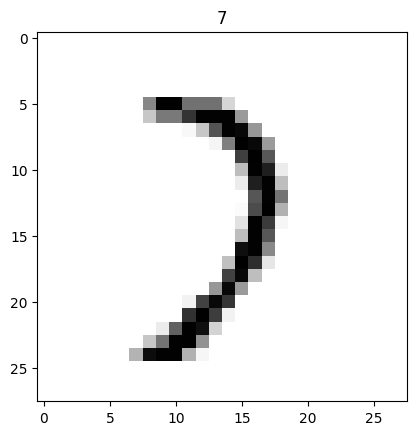

In [ ]:
index =140
plt.title(y_train[index])
plt.imshow(x_train[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()

## Deep Learning

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

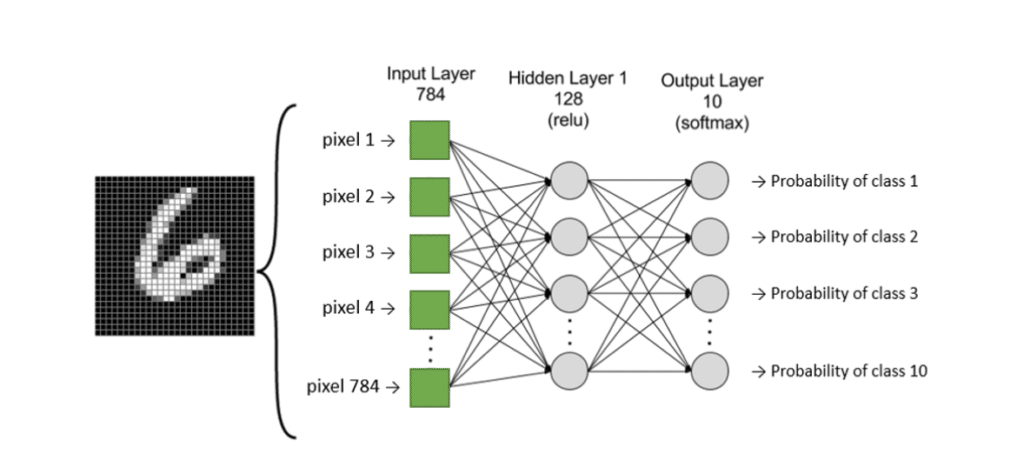

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 3.7383 - accuracy: 0.7531 - val_loss: 0.6653 - val_accuracy: 0.8377
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6233 - accuracy: 0.8456 - val_loss: 0.4728 - val_accuracy: 0.8860
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4540 - accuracy: 0.8829 - val_loss: 0.3802 - val_accuracy: 0.9176
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3770 - accuracy: 0.9004 - val_loss: 0.3323 - val_accuracy: 0.9257
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3437 - accuracy: 0.9090 - val_loss: 0.3110 - val_accuracy: 0.9279
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3174 - accuracy: 0.9152 - val_loss: 0.2955 - val_accuracy: 0.9388
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2875 - accuracy: 0.9219 - val_loss: 0.2636 - val_accuracy: 0.9402
Epoch 

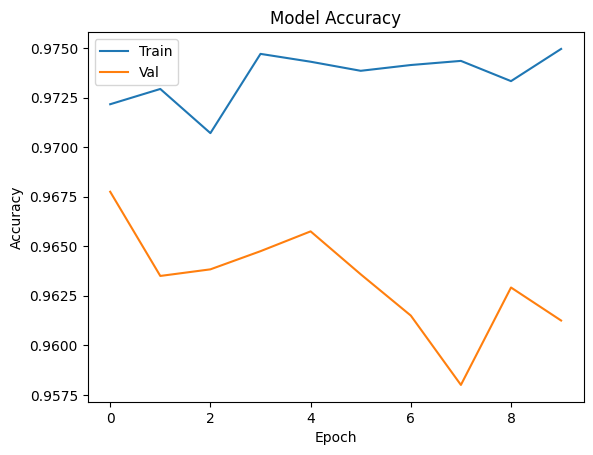

In [ ]:
plot_acc(history)

# Evaluación del Modelo

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2583 - accuracy: 0.9425


[0.2583170533180237, 0.9424999952316284]

In [ ]:
predicciones = model.predict(x_test)
y_pred = np.argmax(predicciones, axis=1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.96      0.90      0.93       892
           6       0.95      0.96      0.96       958
           7       0.99      0.90      0.94      1028
           8       0.87      0.95      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
errores = np.where(y_pred != y_test)[0]
errores

array([  18,   77,   80,   97,  115,  149,  151,  217,  233,  241,  245,
        247,  255,  259,  300,  320,  321,  340,  352,  358,  366,  404,
        406,  445,  448,  457,  460,  468,  478,  495,  502,  508,  522,
        543,  551,  582,  610,  619,  629,  654,  659,  673,  707,  717,
        720,  726,  740,  810,  829,  839,  874,  881,  898,  938,  944,
        950,  956,  965,  982,  990, 1014, 1022, 1039, 1044, 1055, 1073,
       1082, 1089, 1107, 1112, 1114, 1119, 1124, 1143, 1147, 1156, 1164,
       1166, 1178, 1182, 1191, 1194, 1204, 1209, 1216, 1226, 1228, 1232,
       1242, 1247, 1251, 1256, 1260, 1272, 1289, 1299, 1325, 1326, 1328,
       1378, 1393, 1411, 1414, 1436, 1467, 1476, 1500, 1522, 1530, 1549,
       1553, 1554, 1559, 1571, 1587, 1595, 1609, 1611, 1621, 1670, 1671,
       1678, 1681, 1696, 1709, 1718, 1721, 1751, 1754, 1755, 1762, 1790,
       1800, 1809, 1828, 1878, 1883, 1885, 1901, 1903, 1930, 1941, 1952,
       1969, 1970, 1982, 1987, 2016, 2024, 2028, 20

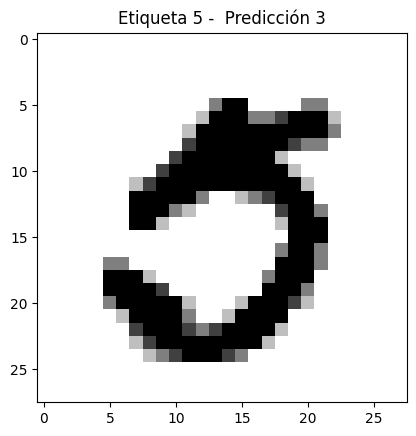

In [ ]:
index =9719
plt.title("Etiqueta {} -  Predicción {}".format(y_test[index], y_pred[index]))

plt.imshow(x_test[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()